# Regressão Linear - E-Commerce

#### Problemática

Você obteve algum contrato de trabalho com uma empresa de comércio eletrônico com sede na cidade de Nova York que vende roupas online, mas também tem sessões de consultoria em estilo e vestuário na loja. Os clientes entram na loja, têm sessões / reuniões com um estilista pessoal, então podem ir para casa e encomendarem em um aplicativo móvel ou site para a roupa que desejam.

A empresa está tentando decidir se deve concentrar seus esforços em sua experiência em aplicativos móveis ou em seu site. Eles contrataram você no contrato para ajudá-los a descobrir isso! Vamos começar!

* Observações: Dados ficitícios.

## Importando as bibliotecas necessárias

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Obter dados

O arquivo csv do Ecommerce Customers da empresa. Possui informações do cliente, como Email, Endereço e sua cor Avatar. Em seguida, ele também possui colunas de valores numéricos:.

* Avg. Session Length: Tempo médio das sessões de consultoria de estilo na loja.
* Time on App: tempo médio gasto no app em minutos.
* Time on Website: tempo médio gasto no site em minutos.
* Lenght of Membership: Há quantos anos o cliente é membro.
* Yearly Amount Spent: Gasto Anual do cliente.

In [5]:
clientes = pd.read_csv("Ecommerce Customers")

### Conhecendo melhor o dataframe

In [6]:
clientes.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
clientes.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


In [18]:
clientes.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

## Análise de dados exploratória


In [12]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

### Jointplot entre o tempo no Website vs Valor gasto anualmente

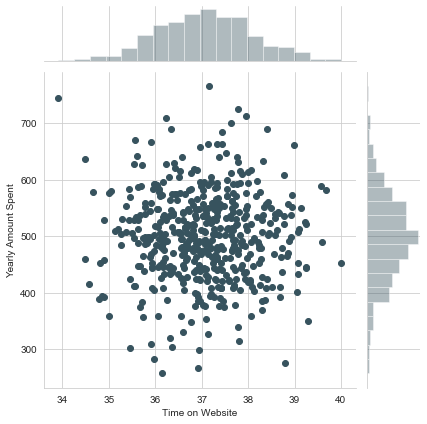

In [14]:
sns.jointplot(x='Time on Website', y = 'Yearly Amount Spent', data = clientes)

** Faça o mesmo, mas com a coluna tempo no aplicativo (Time on App), em vez disso. **

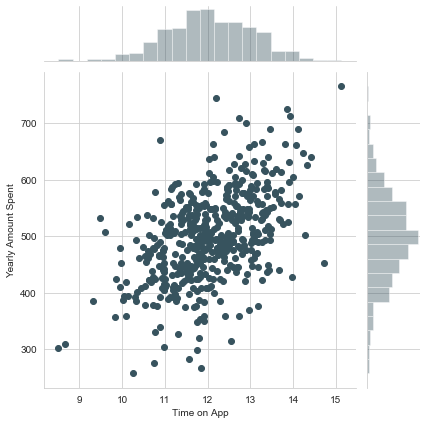

In [15]:
sns.jointplot (x = 'Time on App', y='Yearly Amount Spent', data = clientes)

### Jointplot entre o tempo no App vs Valor gasto anualmente

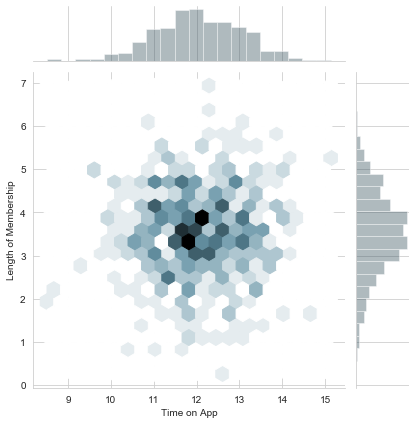

In [17]:
sns.jointplot (x = 'Time on App', y='Length of Membership',kind='hex', data = clientes)

### Explorando tipos de relações em todo o conjunto de dados com o Pairplot

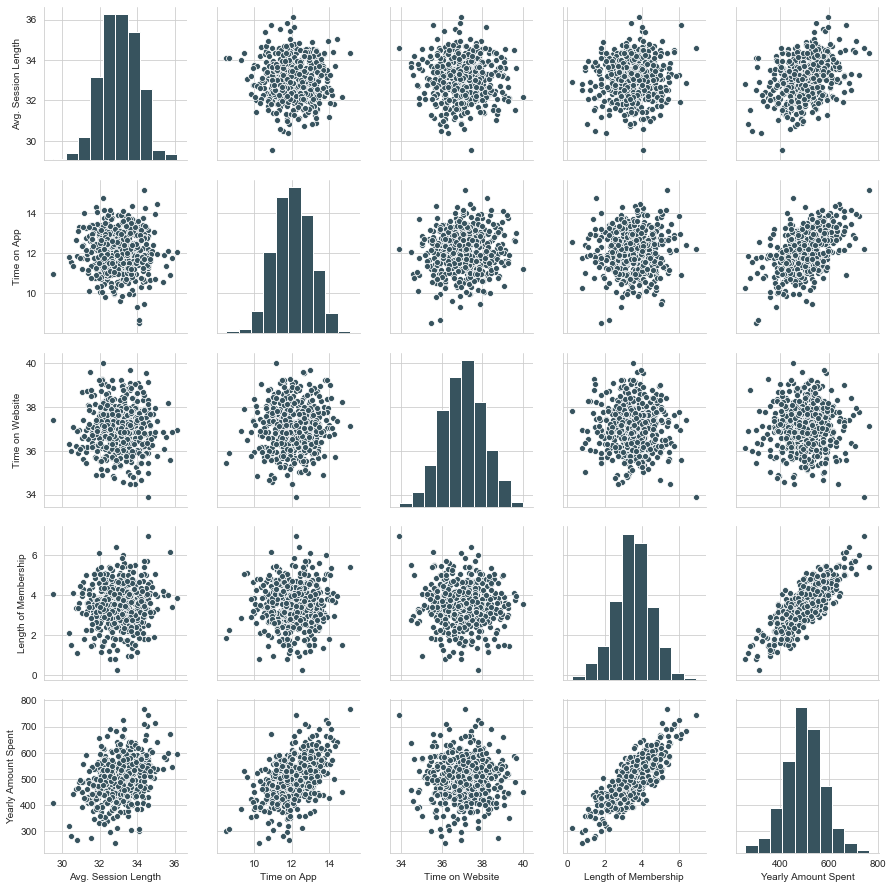

In [19]:
sns.pairplot(clientes[['Avg. Session Length', 'Time on App',
                       'Time on Website', 'Length of Membership', 'Yearly Amount Spent']])

Com este gráfico, podemos perceber que há uma forte relação entre o total gasto anualmente (Yearly Amount Spent) e o tempo em que o cliente é membro (Length of Membership).

Abaixo um gráfico detalhando esse relacionamento:

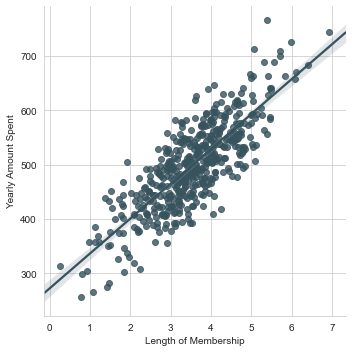

In [20]:
sns.lmplot(x ='Length of Membership', y = 'Yearly Amount Spent', data = clientes)

## Treinando e testando os dados

* X = Dados númericos dos clientes

* Y = Dados sobre a quantidade gasta anualmente de cada cliente

In [21]:
X = clientes[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [22]:
Y = clientes[['Yearly Amount Spent']]

### Realizando a segmentação entre os dados de treino e teste

In [23]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state =101)

## Treinando o modelo

In [28]:
from sklearn.linear_model import LinearRegression

Criando um objeto para a classe LinearRegression

In [86]:
lm = LinearRegression()

Utilizando o método 'fit' para treinar o modelo

In [87]:
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Print dos coeficientes do modelo**

In [96]:
lm.coef_

array([[25.98154972, 38.59015875,  0.19040528, 61.27909654]])

## Previsão de dados de teste

Inciando a avaliação de desempenho ao prever os valores de teste!

In [33]:
predict = lm.predict(X_test)

Utilizando o scatterplot para realizar uma comparação entre os valores reais e os valores preditos.

Text(0, 0.5, 'Predicted Yearly Amount Spent')

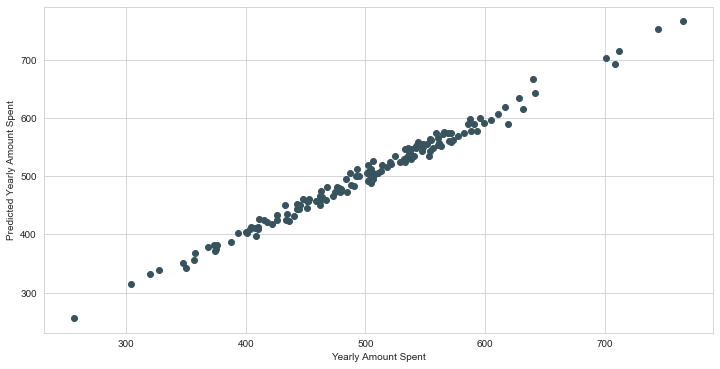

In [41]:
plt.figure(figsize=(12,6))
plt.scatter(Y_test,predict)
plt.xlabel('Yearly Amount Spent')
plt.ylabel('Predicted Yearly Amount Spent')

## Avaliando o Modelo

Vamos avaliar o desempenho do nosso modelo utilizando o MAE (Mean Absolute Error) e o RMSE(Mean Squared Error)

In [43]:
from sklearn import metrics

In [103]:
print('MAE:', metrics.mean_absolute_error(Y_test, predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predict)))

MAE: 7.2281486534308295
RMSE: 8.933815066978626


## Resíduos

Traçando um histograma dos resíduos, é possivel notar de que ele parece com uma distribuição normal, onde a maioria dos resíduos estão próximos a zero

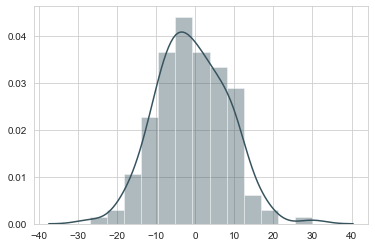

In [47]:
sns.distplot((Y_test-predict))

## Conclusão

Criando um dataframe do pandas com os coeficientes para melhor visualização

In [98]:
coefs = pd.DataFrame(lm.coef_[0], X.columns, columns=['Coeficientes'])

In [102]:
coefs.sort_values(by='Coeficientes',ascending = False)

,Coeficientes
Length of Membership,61.279097
Time on App,38.590159
Avg. Session Length,25.981550
Time on Website,0.190405


Interpretando os coeficientes:

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade na média de tempo de uso está associado a um aumento de 25,98 dólares totais gastos.

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade no tempo gasto no App está associado a um aumento de 38,59 dólares totais gastos.

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade no tempo no site está associado a um aumento de 0,19 dólares em dólares.

**Mantendo todos as outras variáveis constantes**, um aumento de 1 unidade no tempo de Associação está associado a um aumento de 61,27 dólares em dólares


### Próximas Ações

Primeiramente, a empresa provevelmente deveria arranjar outras formas de fidelizar seu cliente, já que essa é a variável que mais ifluenciam os gastos dos seus usuários. Entre site e aplicativo, investiriamos no aplicavo, dado que o mesmo apresenta um coeficiente significativamente maior do que o site.